

download the data
put into a dataframe, look at how it looks like



TODO:

Check for non-english words
Might remove extremely rare words as well

In [1]:
# General
import collections
import re

# Pandas, numpy
import numpy as np
import pandas as pd

# NLP related
import nltk
import spacy

# from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/banyaidora/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/banyaidora/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/banyaidora/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Download dataset

In [3]:
def download_dataset():
  !curl https://storage.googleapis.com/atomic-bird-188013.appspot.com/archive.zip -o archive.zip
  !unzip 'archive.zip'

def load_dataset():
  df = pd.read_csv('MBTI 500.csv')
  return df

In [4]:


# download_dataset()

df = load_dataset()
# download and extract data

## High level data exploration

Aims to clear additional words might not needed

In [5]:
df

,posts,type
0,know intj tool use interaction people excuse a...,INTJ
1,rap music ehh opp yeah know valid well know fa...,INTJ
2,preferably p hd low except wew lad video p min...,INTJ
3,drink like wish could drink red wine give head...,INTJ
4,space program ah bad deal meing freelance max ...,INTJ
...,...,...
106062,stay frustrate world life want take long nap w...,INFP
106063,fizzle around time mention sure mistake thing ...,INFP
106064,schedule modify hey w intp strong wing underst...,INFP
106065,enfj since january busy schedule able spend li...,INFP


In [6]:
%%time

df_tokenized = df['posts'].apply(lambda x: nltk.word_tokenize(x)) # NLTK tokenizer, might use spaCy instead

CPU times: user 2min 56s, sys: 1.66 s, total: 2min 57s
Wall time: 2min 57s


In [7]:
def return_count_words(type = 'all', count_num = 10, plot = True):
    if type != 'all':
        tokenized_docs = df_tokenized[df['type']==type].copy()
    else:
        tokenized_docs = df_tokenized.copy()

    all_words = [word for doc in tokenized_docs for word in doc]

    all_words_counter = collections.Counter(all_words)
    top = all_words_counter.most_common(count_num)

    if plot:
        x, y = zip(*all_words_counter.most_common(count_num))
        fig, ax = plt.subplots(figsize=(40, 10))
        ax.bar(x, y)
        ax.set_title(f'The {count_num} most common words in type {type}')
    
    return top


,ALL
0,"(like, 698166)"
1,"(think, 595961)"
2,"(people, 553946)"
3,"(get, 533097)"
4,"(thing, 406537)"
5,"(make, 405953)"
6,"(know, 379682)"
7,"(feel, 373270)"
8,"(one, 369594)"
9,"(go, 363834)"


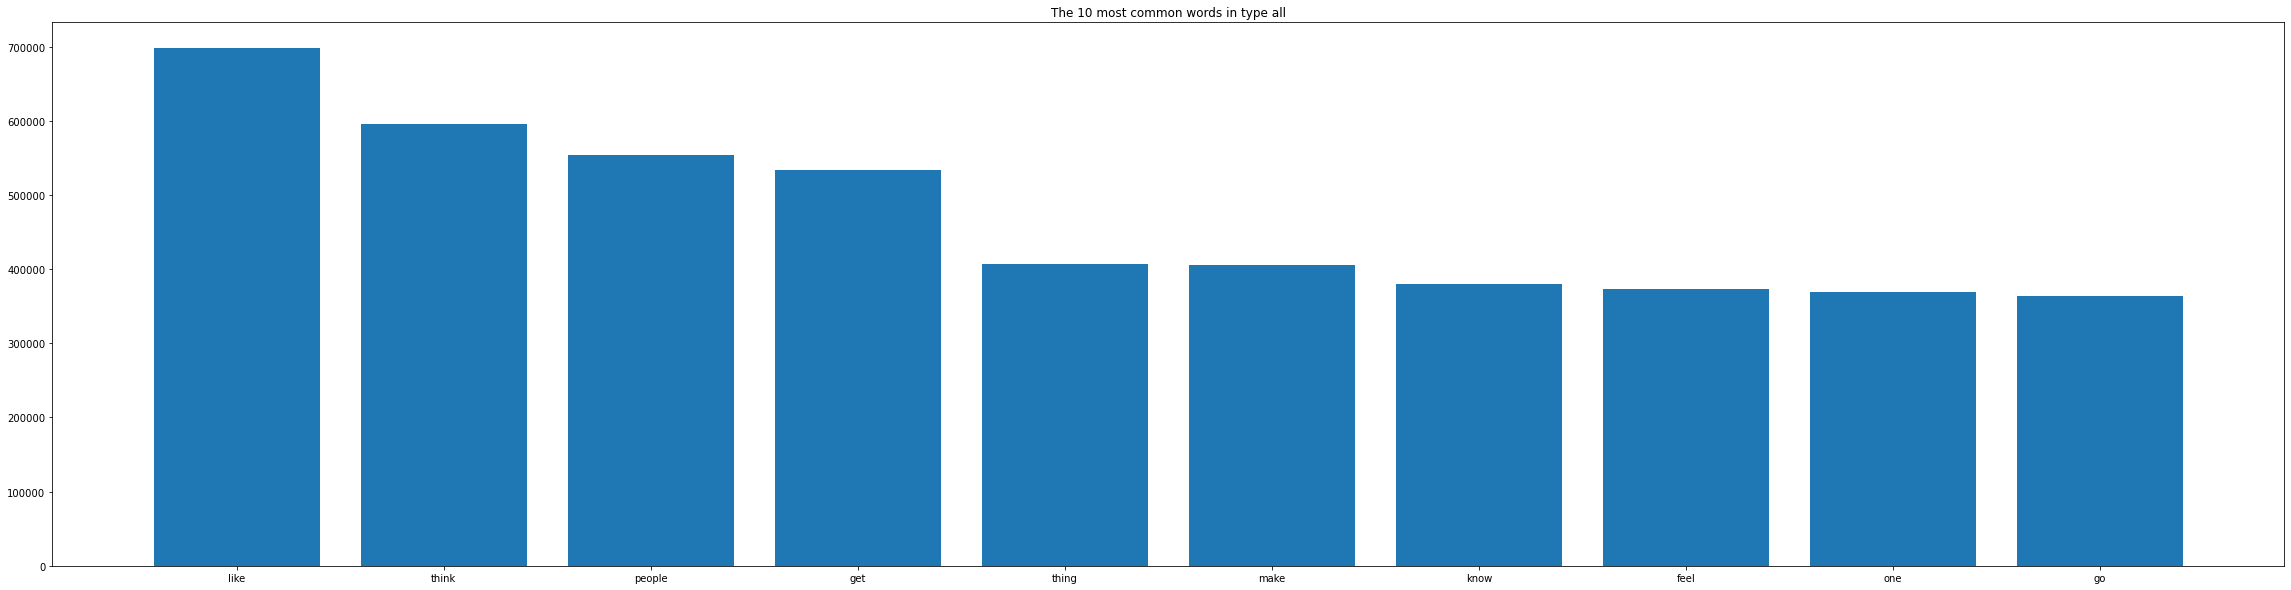

In [9]:
count_df = pd.DataFrame()
count_df['ALL'] = return_count_words()
count_df

In [14]:
unique_types = df['type'].unique()
for i in unique_types:
    count_df[i] = return_count_words(type = i, plot = False)
count_df

,ALL,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP,ENFJ,ENFP,ENTJ,ENTP,ESFJ,ESFP,ESTJ,ESTP,INFJ,INFP
0,"(like, 698166)","(like, 135640)","(like, 157409)","(like, 4831)","(like, 7425)","(like, 8615)","(like, 22470)","(like, 10574)","(like, 44551)","(like, 17222)","(like, 77545)","(like, 1498)","(like, 3231)","(think, 2895)","(like, 10653)","(like, 103100)","(like, 90731)"
1,"(think, 595961)","(people, 120377)","(think, 141471)","(think, 4167)","(think, 6081)","(get, 6607)","(get, 18511)","(think, 9264)","(get, 35114)","(get, 14924)","(think, 69751)","(think, 1353)","(think, 2242)","(like, 2671)","(get, 8960)","(think, 89208)","(think, 72435)"
2,"(people, 553946)","(think, 115526)","(people, 125875)","(people, 3467)","(get, 4312)","(think, 6485)","(people, 17847)","(people, 8967)","(think, 34809)","(people, 14604)","(people, 61031)","(people, 1049)","(people, 1932)","(people, 2090)","(people, 8408)","(people, 83557)","(people, 62125)"
3,"(get, 533097)","(get, 110973)","(get, 121701)","(get, 3319)","(people, 4265)","(people, 5671)","(think, 17449)","(feel, 7462)","(people, 32681)","(think, 14527)","(get, 60011)","(get, 915)","(get, 1782)","(get, 1894)","(think, 8298)","(get, 76174)","(get, 60678)"
4,"(thing, 406537)","(make, 85593)","(thing, 95794)","(thing, 2859)","(thing, 3610)","(go, 5118)","(thing, 12585)","(get, 7222)","(feel, 29093)","(make, 10788)","(make, 46478)","(type, 891)","(know, 1465)","(type, 1862)","(would, 7024)","(feel, 72805)","(feel, 59917)"
5,"(make, 405953)","(thing, 85017)","(make, 94112)","(feel, 2652)","(know, 3449)","(thing, 4808)","(go, 12454)","(make, 6325)","(thing, 25558)","(one, 10281)","(thing, 44069)","(know, 849)","(type, 1458)","(det, 1753)","(one, 6165)","(thing, 60757)","(thing, 48428)"
6,"(know, 379682)","(go, 78185)","(one, 86267)","(make, 2582)","(feel, 3377)","(time, 4798)","(make, 12201)","(know, 6303)","(make, 25484)","(would, 9739)","(one, 41360)","(make, 720)","(say, 1439)","(er, 1746)","(make, 5851)","(know, 60460)","(know, 46846)"
7,"(feel, 373270)","(one, 78050)","(know, 82823)","(say, 2490)","(really, 3306)","(make, 4627)","(say, 12106)","(thing, 5902)","(know, 24558)","(good, 9709)","(know, 40933)","(esfj, 720)","(make, 1374)","(would, 1529)","(know, 5636)","(make, 58498)","(make, 46628)"
8,"(one, 369594)","(know, 76724)","(would, 82306)","(know, 2432)","(say, 3251)","(know, 4612)","(know, 11503)","(say, 5456)","(go, 23378)","(know, 9629)","(say, 40872)","(say, 711)","(one, 1345)","(make, 1510)","(say, 5612)","(go, 54305)","(really, 45154)"
9,"(go, 363834)","(time, 76398)","(say, 81821)","(really, 2395)","(make, 3182)","(would, 4532)","(would, 11380)","(really, 5441)","(time, 22492)","(thing, 9351)","(go, 39113)","(feel, 694)","(thing, 1328)","(say, 1488)","(go, 5525)","(time, 54178)","(one, 44194)"
